# CSE213 - Numerical Analysis

# Lab 3 - Interpolation Methods (II)

## Newton's Forward Difference

*   List item
*   List item



Let the function $f(x)$ take the values $y_0, y_1, y_2, \ldots, y_n$ corresponding to the values $x_0, x_1, x_2, \ldots, x_n$ of $x$. Suppose it is required to evaluate $f(x)$ for $x=x_0 + p h$, where $p$ is any real number.

We then apply the formulas below:
$$
\begin{aligned}
& p=\frac{x-x_0}{h}, \\
& f(x)=y_0+p \Delta y_0+\frac{p(p-1)}{2 !} \cdot \Delta^2 y_0+\frac{p(p-1)(p-2)}{3 !} \cdot \Delta^3 y_0+\frac{p(p-1)(p-2)(p-3)}{4 !} \cdot \Delta^4 y_0+\ldots
\end{aligned}
$$
<br>
So the Netwon's polynomial $P_n(x)$ is defined as
$$
P_n(x)=\sum_{k=0}^n\left(\begin{array}{l}
p \\
k
\end{array}\right) \Delta^k f_0, \quad p=\frac{x-x_0}{h} .
$$
<br>
Note that the forward-difference
$\Delta f_i=f_{i+1}-f_i$, with $f\left(x_i\right)=f_i=y_i, i=0,1, \ldots$

Higher powers are then defined recursively by
$$
\Delta^n f_i=\Delta\left(\Delta^{n-1} f_i\right), \quad n=2,3, \ldots
$$

#### Exercise 1
Given the points below, estimate $f(1895)$ using Newton's Forward Difference formula.

|$x$|$$f(x)$$|
|:--:|:--:|
|1891|	46|
|1901|	66|
|1911|	81|
|1921|	93|
|1931|	101|

In [28]:
import numpy as np
import math #  use factorial fucntion to calculate n!
def newton_forward(X, Y):
    n = len(X)


    # construct a forward table
    def forward_diff(y):
      forward_table = np.zeros((n, n))
      forward_table[:, 0] = y # This additional line fixes the assertion problem
      for col in range(1, n):
            for row in range(n - col):
                forward_table[row][col] = forward_table[row + 1][col - 1] - forward_table[row][col - 1];
      return forward_table[0, :]
    # write a function to calculate P values
    def p_cal(p,n):
        temp = p;
        for i in range(1, n):
            temp = temp * (p - i);
        return temp;

    def f(x_):
        h = np.diff(X)[0]
        result = Y[0]
        forward_differance_vaues = forward_diff(Y)

        for i in range(1, n):
            result += (p_cal((x_ - X[0]) / h, i) / math.factorial(i)) * forward_differance_vaues[i]

        return result
    return f



In [29]:
assert np.isclose(newton_forward([1891, 1901, 1911, 1921, 1931], [46, 66, 81, 93, 101])(1895), 54.8528)

If $f$ is $n+1$ times continuously differentiable on a closed interval $\mathrm{I}$ and $P_n(x)$ is a polynomial of degree at most $n$ that interpolates $f$ at $n+1$ distinct points $\left\{x_i\right\}(i=0,1, \ldots, \underline{n})$ in that interval, then for each $x$ in the interval there exists $\xi$ in that interval such that
$$
f(x)-P_n(x)=\frac{f^{(n+1)}(\xi)}{(n+1) !} \prod_{i=0}^n\left(x-x_i\right) .
$$

#### Exercise 2
Consider the function $f(x)=\ln x$.

1. Construct the Lagrange form of the interpolating polynomial for $f$ passing through the points $(1, \ln 1)$, $(2, \ln 2)$, $(3, \ln 3)$, $(4, \ln 4)$ and $(5, \ln 5)$.
2. Repeat the same done in previous yet with more points: $(1, \ln 1)$, $(1.5, \ln 1.5)$, $(2, \ln 2)$, $(2.5, \ln 2.5) \dots (5, \ln 5)$.
3. Estimate $\ln 4.8$ using the two polynomials obtained and find in each case the absolute error and theoretical error bound.

In [39]:
import numpy as np

def lagrange(X, Y):
    def f(x_):
        result = 0
        for i in range(len(X)):
            temp = 1
            for j in range(len(X)):
                if i != j and X[i] != X[j]:
                    temp *= (x_ - X[j]) / (X[i] - X[j])
            result += temp * Y[i]
        return result
    return f

In [40]:
P1 = lagrange([1, 2, 3, 4, 5], [0, np.log(2), np.log(3), np.log(4), np.log(5)])
P2 = lagrange([i // 2 for i in range(2, 11)], [np.log(i // 2) for i in range(2, 11)])

In [41]:
def ln_derivative(x, n=1):
    if x == 0:
      return 0  # or handle the error appropriately
    else:
      return math.factorial(n - 1) * (-1) ** (n - 1) / x ** n

x_1= P1(4.8)
x_2 = P2(4.8)
absolute_err_1 = abs(ln_derivative(x_1) - x_1)
absolute_err_2 = abs(ln_derivative(x_2) - x_2)

theoretical_err_1 = 0
for i in range(len([i // 2 for i in range(2, 11)])):
    theoretical_err_1 += abs((ln_derivative(i) - ln_derivative(4.8)))

theoretical_err_2 = 0
for i in range(len([i // 2 for i in range(2, 11)])):
    theoretical_err_2 += abs((ln_derivative(i) - ln_derivative(4.8)))
print(absolute_err_1, theoretical_err_1)
print(absolute_err_2, theoretical_err_2)

0.9349350692804165 1.657142857142857
10.886521038457573 1.657142857142857


## Spline Interpolation

A function $S$ is called a spline of degree $k$ if it satisfies the following conditions:
1. $S$ is defined in the interval $[a, b]$.
2. $S^{(r)}$ is continuous on $[a, b]$ for $0 \leq r \leq k-1$.
3. $S$ is a polynomial of degree $\leq k$ on each sub-interval $\left[x_i, x_{i+1}\right], i=0,1, \ldots, n-1$.

**Linear Spline** (Spline of degree 1)
$$
S(x)= \begin{cases}S_0(x)=a_0+b_0 x, & x \in\left[x_0, x_1\right] \\ S_1(x)=a_1+b_1 x, & x \in\left[x_1, x_2\right] \\ \vdots & \\ S_{n-1}(x)=a_{n-1}+b_{n-1} x, & x \in\left[x_{n-1}, x_n\right] .\end{cases}
$$
<br>
Using the equation of a line between each two data points, it is easy to see that $S(x)$ can be defined by
$$
S_i(x)=f\left(x_i\right)+\frac{f\left(x_{i+1}\right)-f\left(x_i\right)}{x_{i+1}-x_i}\left(x-x_i\right), \quad i=0,1, \ldots, n-1.
$$

#### Code Example

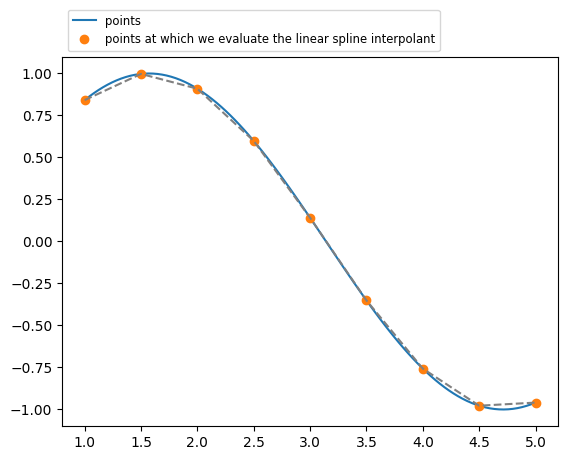

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


'''
We will plot the function np.sin(x) for x in [1, 5].
We will highlight the points at x = 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5.
We will also plot the linear spline interpolant at these points.
'''


'''  1.We will plot the function np.sin(x) for x in [1, 5]. '''
# define the function
def f(x):
    return np.sin(x)
# define the points at which we will evaluate the function
x = np.linspace(1, 5, 100)
# plot the function
plt.plot(x, f(x),label='points')

''' 2.We will highlight the points at x = 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5. '''

# define the points at which we will evaluate the linear spline interpolant
x0 = np.linspace(1, 5, 9)
# define the values of the function at the points x0
y0=f(x0)
# plot the points at which we evaluate the linear spline interpolant
plt.plot(x0, y0,'o',label='points at which we evaluate the linear spline interpolant')


''' 3.We will also plot the linear spline interpolant at these points.'''

# Plot the linear spline interpolant
plt.plot(x0, y0, '--', color="grey")  # Plot the linear spline interpolant without connecting the points

# add a legend
plt.legend(bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

# show the plot
plt.show()